In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

def read_data(path):
    dat=pd.read_csv(path)
    #senorname=pd.Series(dat.keys()[2:-1])
    senorname=dat.keys()[2:-1] 
    return dat, senorname

data,senorname=read_data('pump_sensor.csv')
def explore(data):
    print('Data overview: ')
    print(data.shape); print()
    print('keys :') ; print(data.keys()); print()
    print( 'status options: ');  print( data['machine_status'].unique()); print()
    print (data['machine_status'].value_counts()); print()
    #print((data.isna().sum())[2:-1]); print()
    info=data.describe()
    variance=pd.DataFrame({'var':data.var()})
    info=pd.concat([info,variance.transpose()])
    return data.head(), data.tail(), info

head,tail,info=explore(data)
info

Data overview: 
(220320, 55)

keys :
Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

status options: 
['NORMAL' 'BROKEN' 'RECOVERING']

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype

/var/folders/tz/z9b0lkh96gq52x97rfvwrds40000gn/T/ipykernel_65792/3494986210.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance=pd.DataFrame({'var':data.var()})


,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,2.203200e+05,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,1.101595e+05,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,6.360105e+04,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000e+00,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,5.507975e+04,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,1.101595e+05,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,1.652392e+05,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,2.203190e+05,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000
var,4.045094e+09,0.169931,10.868004,13.445572,5.851012,20742.887193,299.229350,4.681754,4.845085,4.150960,...,105.257765,121.978855,134.011998,164.801917,244.649751,109.044492,6764.232920,366.477334,4258.691443,12009.662837


In [2]:


def preprocess_labels(data):
    from sklearn import preprocessing

    #Label Mapping
    le = preprocessing.LabelEncoder()
    le.fit(data)
    encoded_y=le.transform(data)
    #Get the Label map
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    return pd.DataFrame(encoded_y,columns=['target'])

encoded_y=preprocess_labels(data['machine_status'])


{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


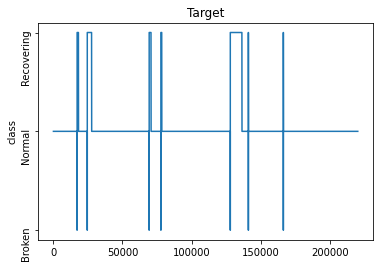

In [3]:

x=np.linspace(1,len(encoded_y),len(encoded_y)) # create x-axis (could also be the converted timestamp column)
plt.plot(x,encoded_y) 
plt.ylabel('class')
plt.title('Target')
labels = ['Normal','Broken','Recovering'] # Give the y-axis the Class lables we found earlier
plt.yticks([1,0,2], labels, rotation='vertical') # Set the y-ticks to three to only show the classnames
plt.show()   

In [4]:
def plotting_stuff(data,plottype,Title, saving=False):
    #plt.plot(dat.loc[:,['sensor_01']])
    fig=plt.figure()
    data.plot(kind=plottype)
    #plt.stem(data)
    plt.title(Title)
    #plt.xticks(rotation=45)
    if saving==True:
        plt.savefig(Title+'.png', format='png', dpi=300, transparent=True)  

def plot_Y(data, col='target', saving=False, name='target'):
    import numpy as np
    y=data[col]; x=np.linspace(1,len(y),len(y))
    plt.plot(x,y)
    plt.ylabel('class')
    plt.title('Target')
    labels = ['Normal','Broken','Recovering']
    if col=='target':
        plt.yticks([1,0,2], labels, rotation='vertical')
    elif col=='machine_status':
        plt.yticks([0,1,2], labels, rotation='vertical')
    if saving==True:
        plt.savefig(name+'.png', format='png', dpi=300, transparent=True)
    plt.show()   

def plotting_together(Values): 
    fig=plt.Figure()
    Values.plot(subplots = True, sharex = True, figsize=(30,55))    
    plt.savefig('Overview.png', format='png', dpi=300, transparent=True)
    plt.show    

def plotting_merged(data, encoded_y, senorname, saving=False):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_dat = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    for i in senorname:
        fig=plt.figure()
        ax=scaled_dat[i].plot.line()
        encoded_y.plot(ax=ax)
        plt.title('together_' + str(i) )
        plt.legend(['sensor','target'])
        if saving==True:
            fig.savefig('Sensor_'+str(i)+'.png', format='png', dpi=300, transparent=True)
        plt.show() 


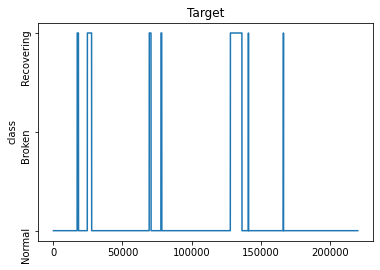

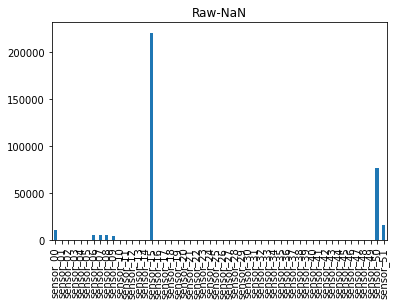

<Figure size 432x288 with 0 Axes>

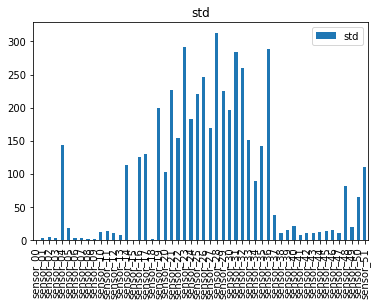

<Figure size 432x288 with 0 Axes>

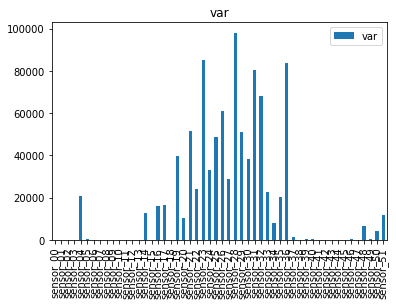

In [5]:
info_std=info.loc[['std']][senorname]
info_var=info.loc[['var']][senorname]

plot_Y(data,col='machine_status',saving=True,name='Classes')
plotting_stuff((data.isna().sum())[2:-1],'bar','Raw-NaN',saving=False) # show which sensors have how many NANs
plotting_stuff(info_std.transpose(),'bar','std',saving=True)# Show std
plotting_stuff(info_var.transpose(),'bar','var',saving=True)# Show std

In [6]:


def manipulate_X(data, printplot=False):
    data=data.drop(labels=['sensor_15'],axis=1)#bad sensors
    data=data.drop(labels=['sensor_00'],axis=1)#bad sensors

    data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
    data=data.drop(labels=['sensor_50'],axis=1)#bad sensors

   # data=data.drop(labels=['sensor_00','sensor_15','sensor_37','sensor_50'],axis=1)#bad sensors
    data=data.drop(labels=['sensor_06','sensor_07','sensor_08','sensor_09'],axis=1)# low variance NaNs
    data=data.fillna(method="pad",limit=30)
    data=data.dropna()
    if printplot==True:
        print((data.isna().sum()))
        plotting_stuff((data.isna().sum()[2:-1]),'bar','fill_nan',saving=True)
        
    return data   
manipulate_X(data,False)

/var/folders/tz/z9b0lkh96gq52x97rfvwrds40000gn/T/ipykernel_65792/248261606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51


,Unnamed: 0,timestamp,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_10,sensor_11,sensor_12,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,0,2018-04-01 00:00:00,47.09201,53.211800,46.310760,634.375000,76.45975,37.22740,47.52422,31.11716,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,1,2018-04-01 00:01:00,47.09201,53.211800,46.310760,634.375000,76.45975,37.22740,47.52422,31.11716,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2,2018-04-01 00:02:00,47.35243,53.211800,46.397570,638.888900,73.54598,37.86777,48.17723,32.08894,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,3,2018-04-01 00:03:00,47.09201,53.168400,46.397568,628.125000,76.98898,38.57977,48.65607,31.67221,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,4,2018-04-01 00:04:00,47.13541,53.211800,46.397568,636.458300,76.58897,39.48939,49.06298,31.95202,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,47.69965,50.520830,43.142361,634.722229,64.59095,43.17085,54.16052,38.05424,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,47.69965,50.564240,43.142361,630.902771,65.83363,43.21038,54.52602,38.53485,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,47.69965,50.520830,43.142361,625.925903,67.29445,43.12836,55.11779,38.52678,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,47.69965,50.520832,43.142361,635.648100,65.09175,42.35746,55.99321,38.89159,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,234.0856,NORMAL


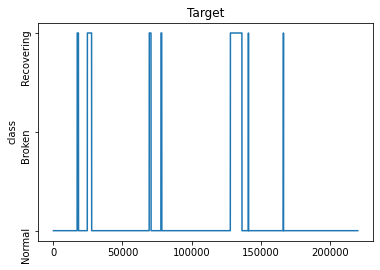

In [7]:
plot_Y(data,col='machine_status',saving=True,name='Classes')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


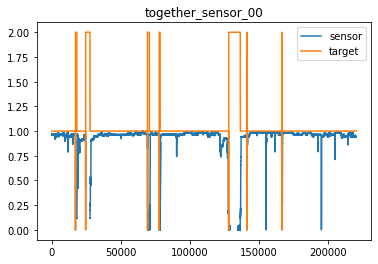

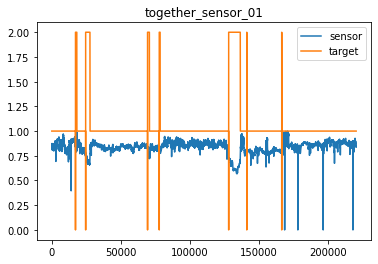

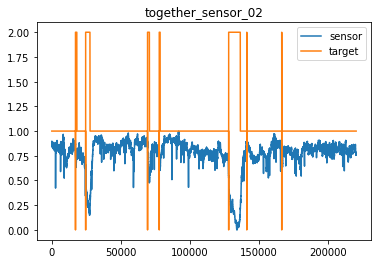

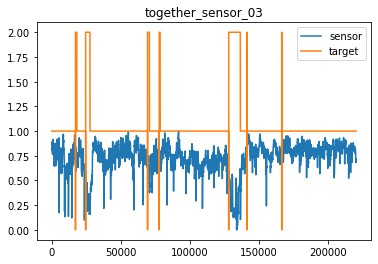

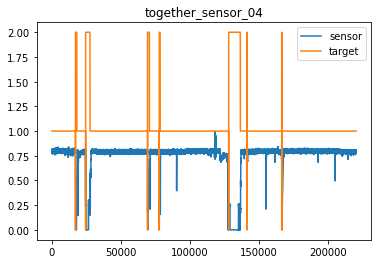

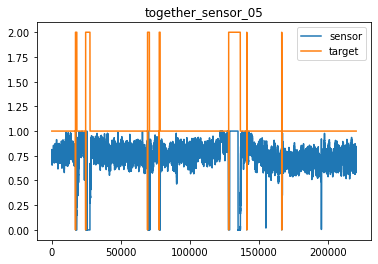

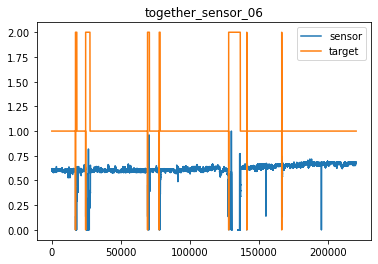

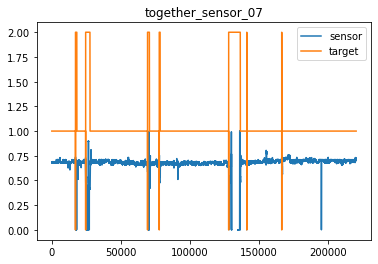

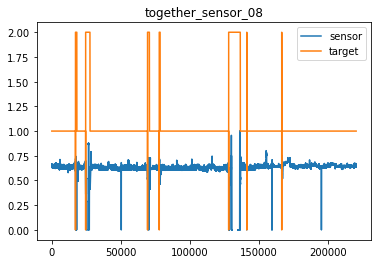

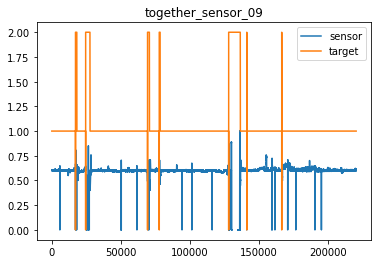

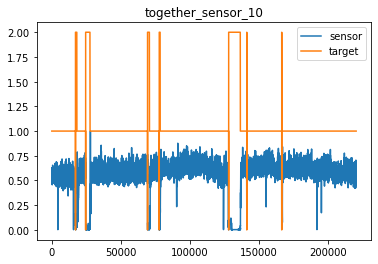

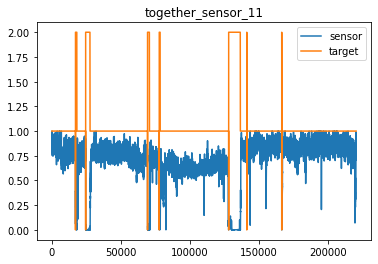

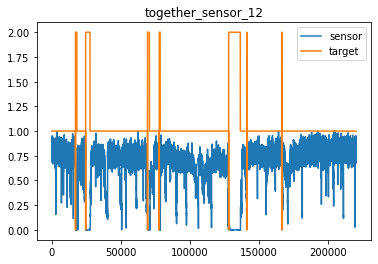

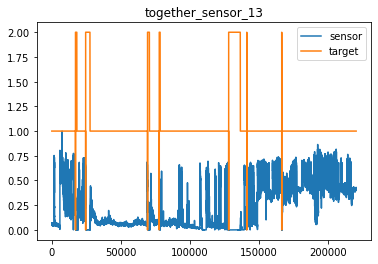

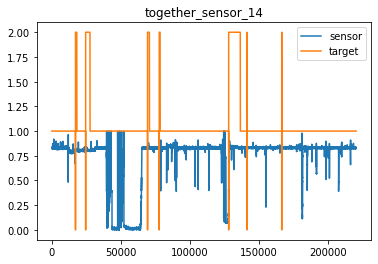

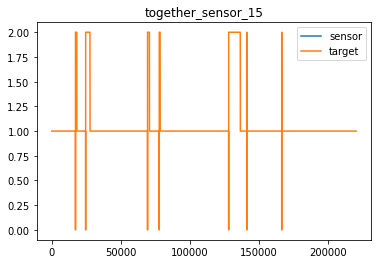

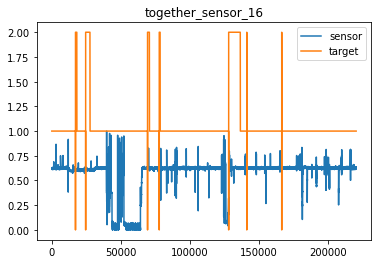

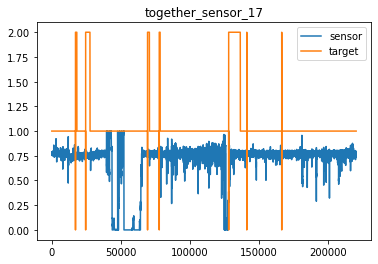

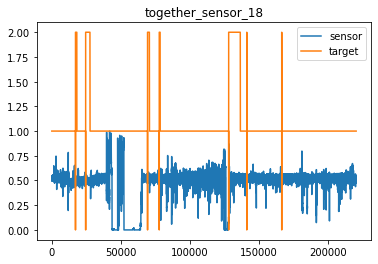

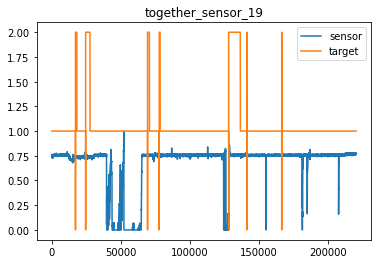

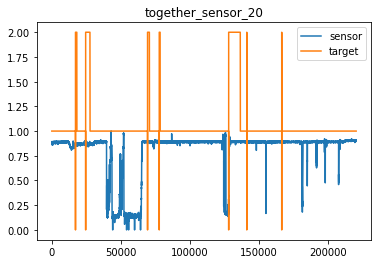

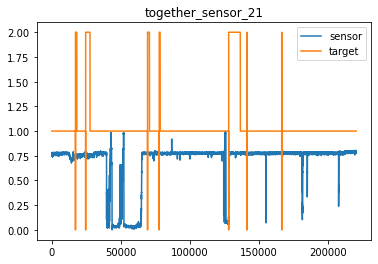

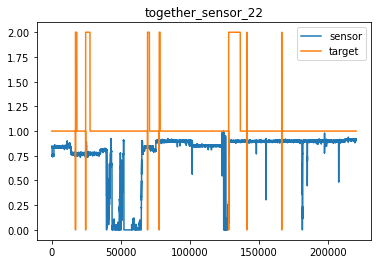

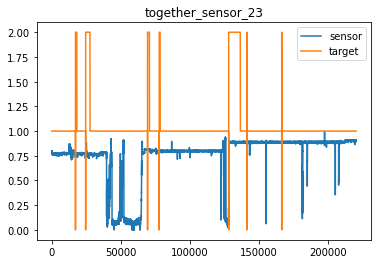

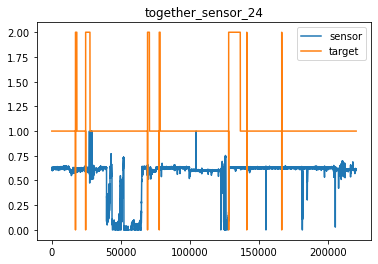

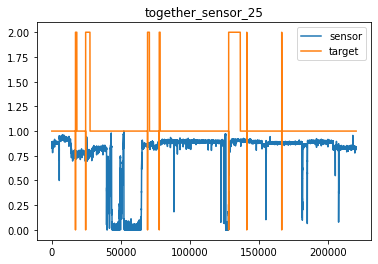

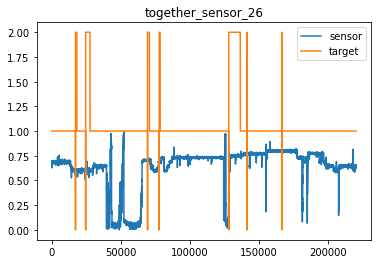

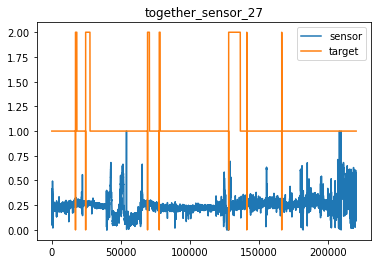

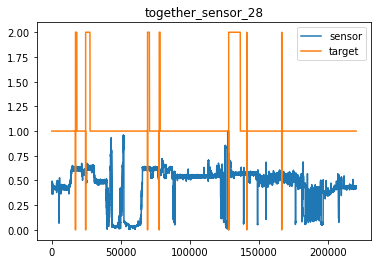

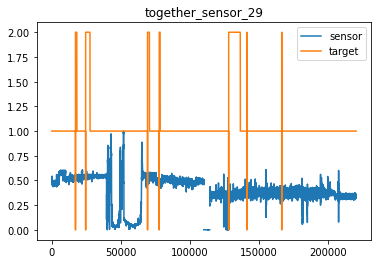

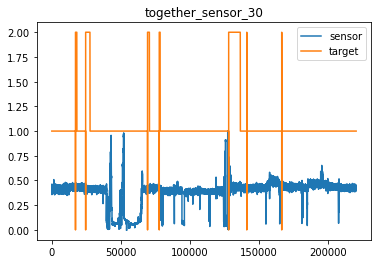

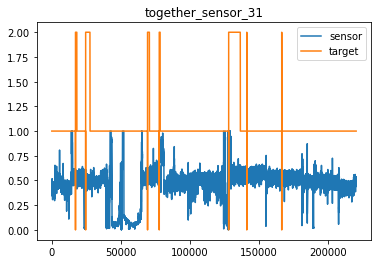

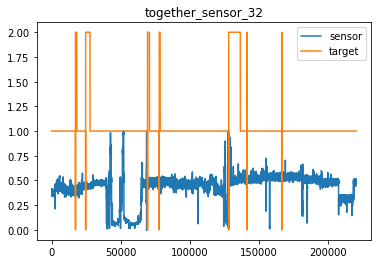

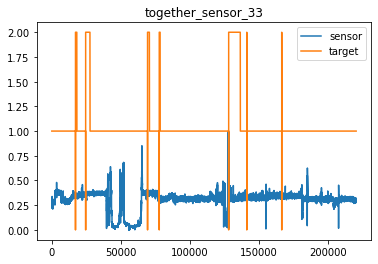

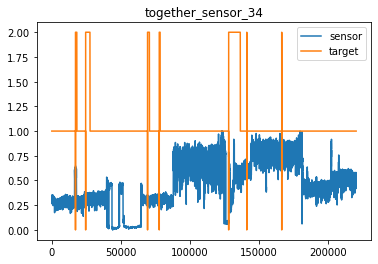

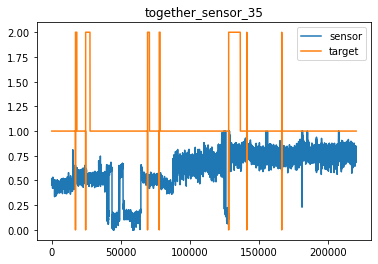

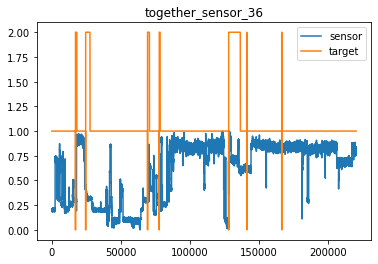

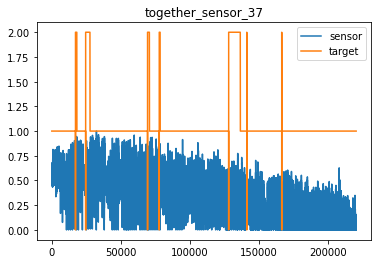

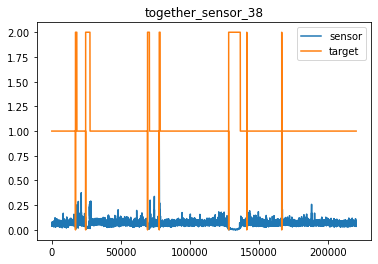

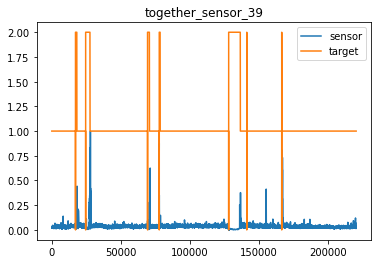

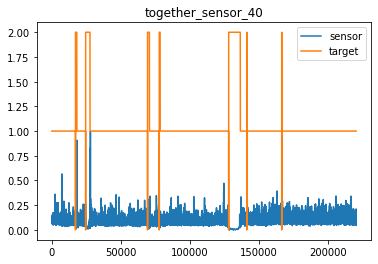

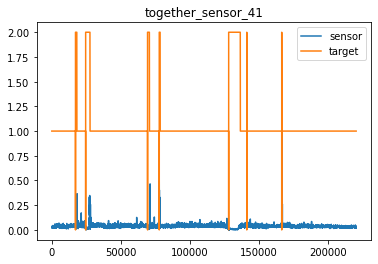

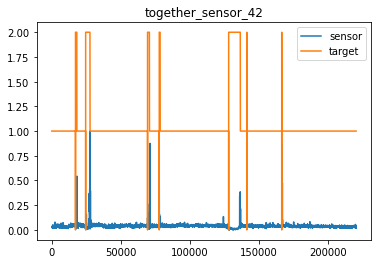

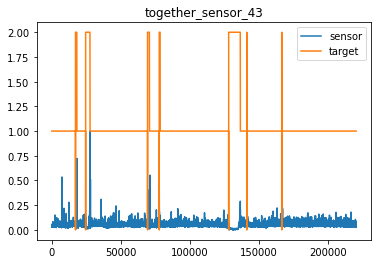

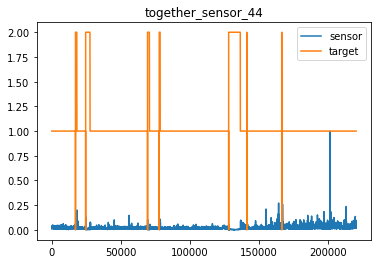

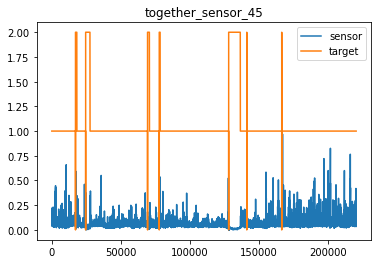

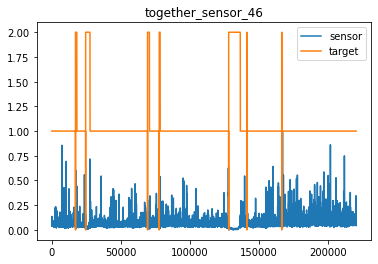

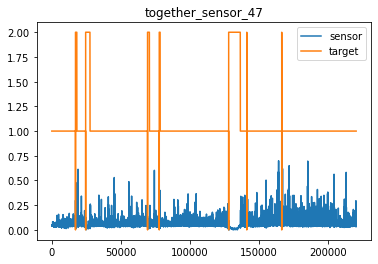

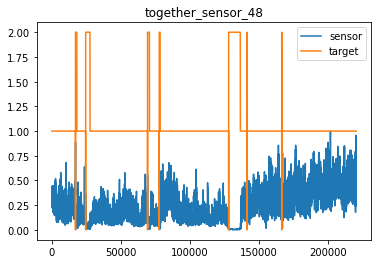

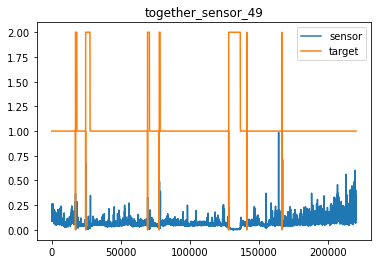

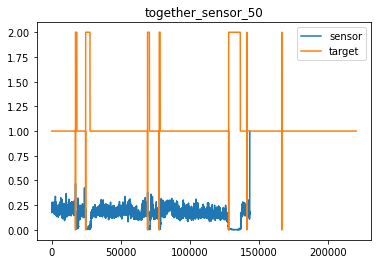

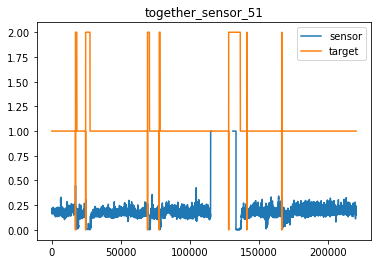

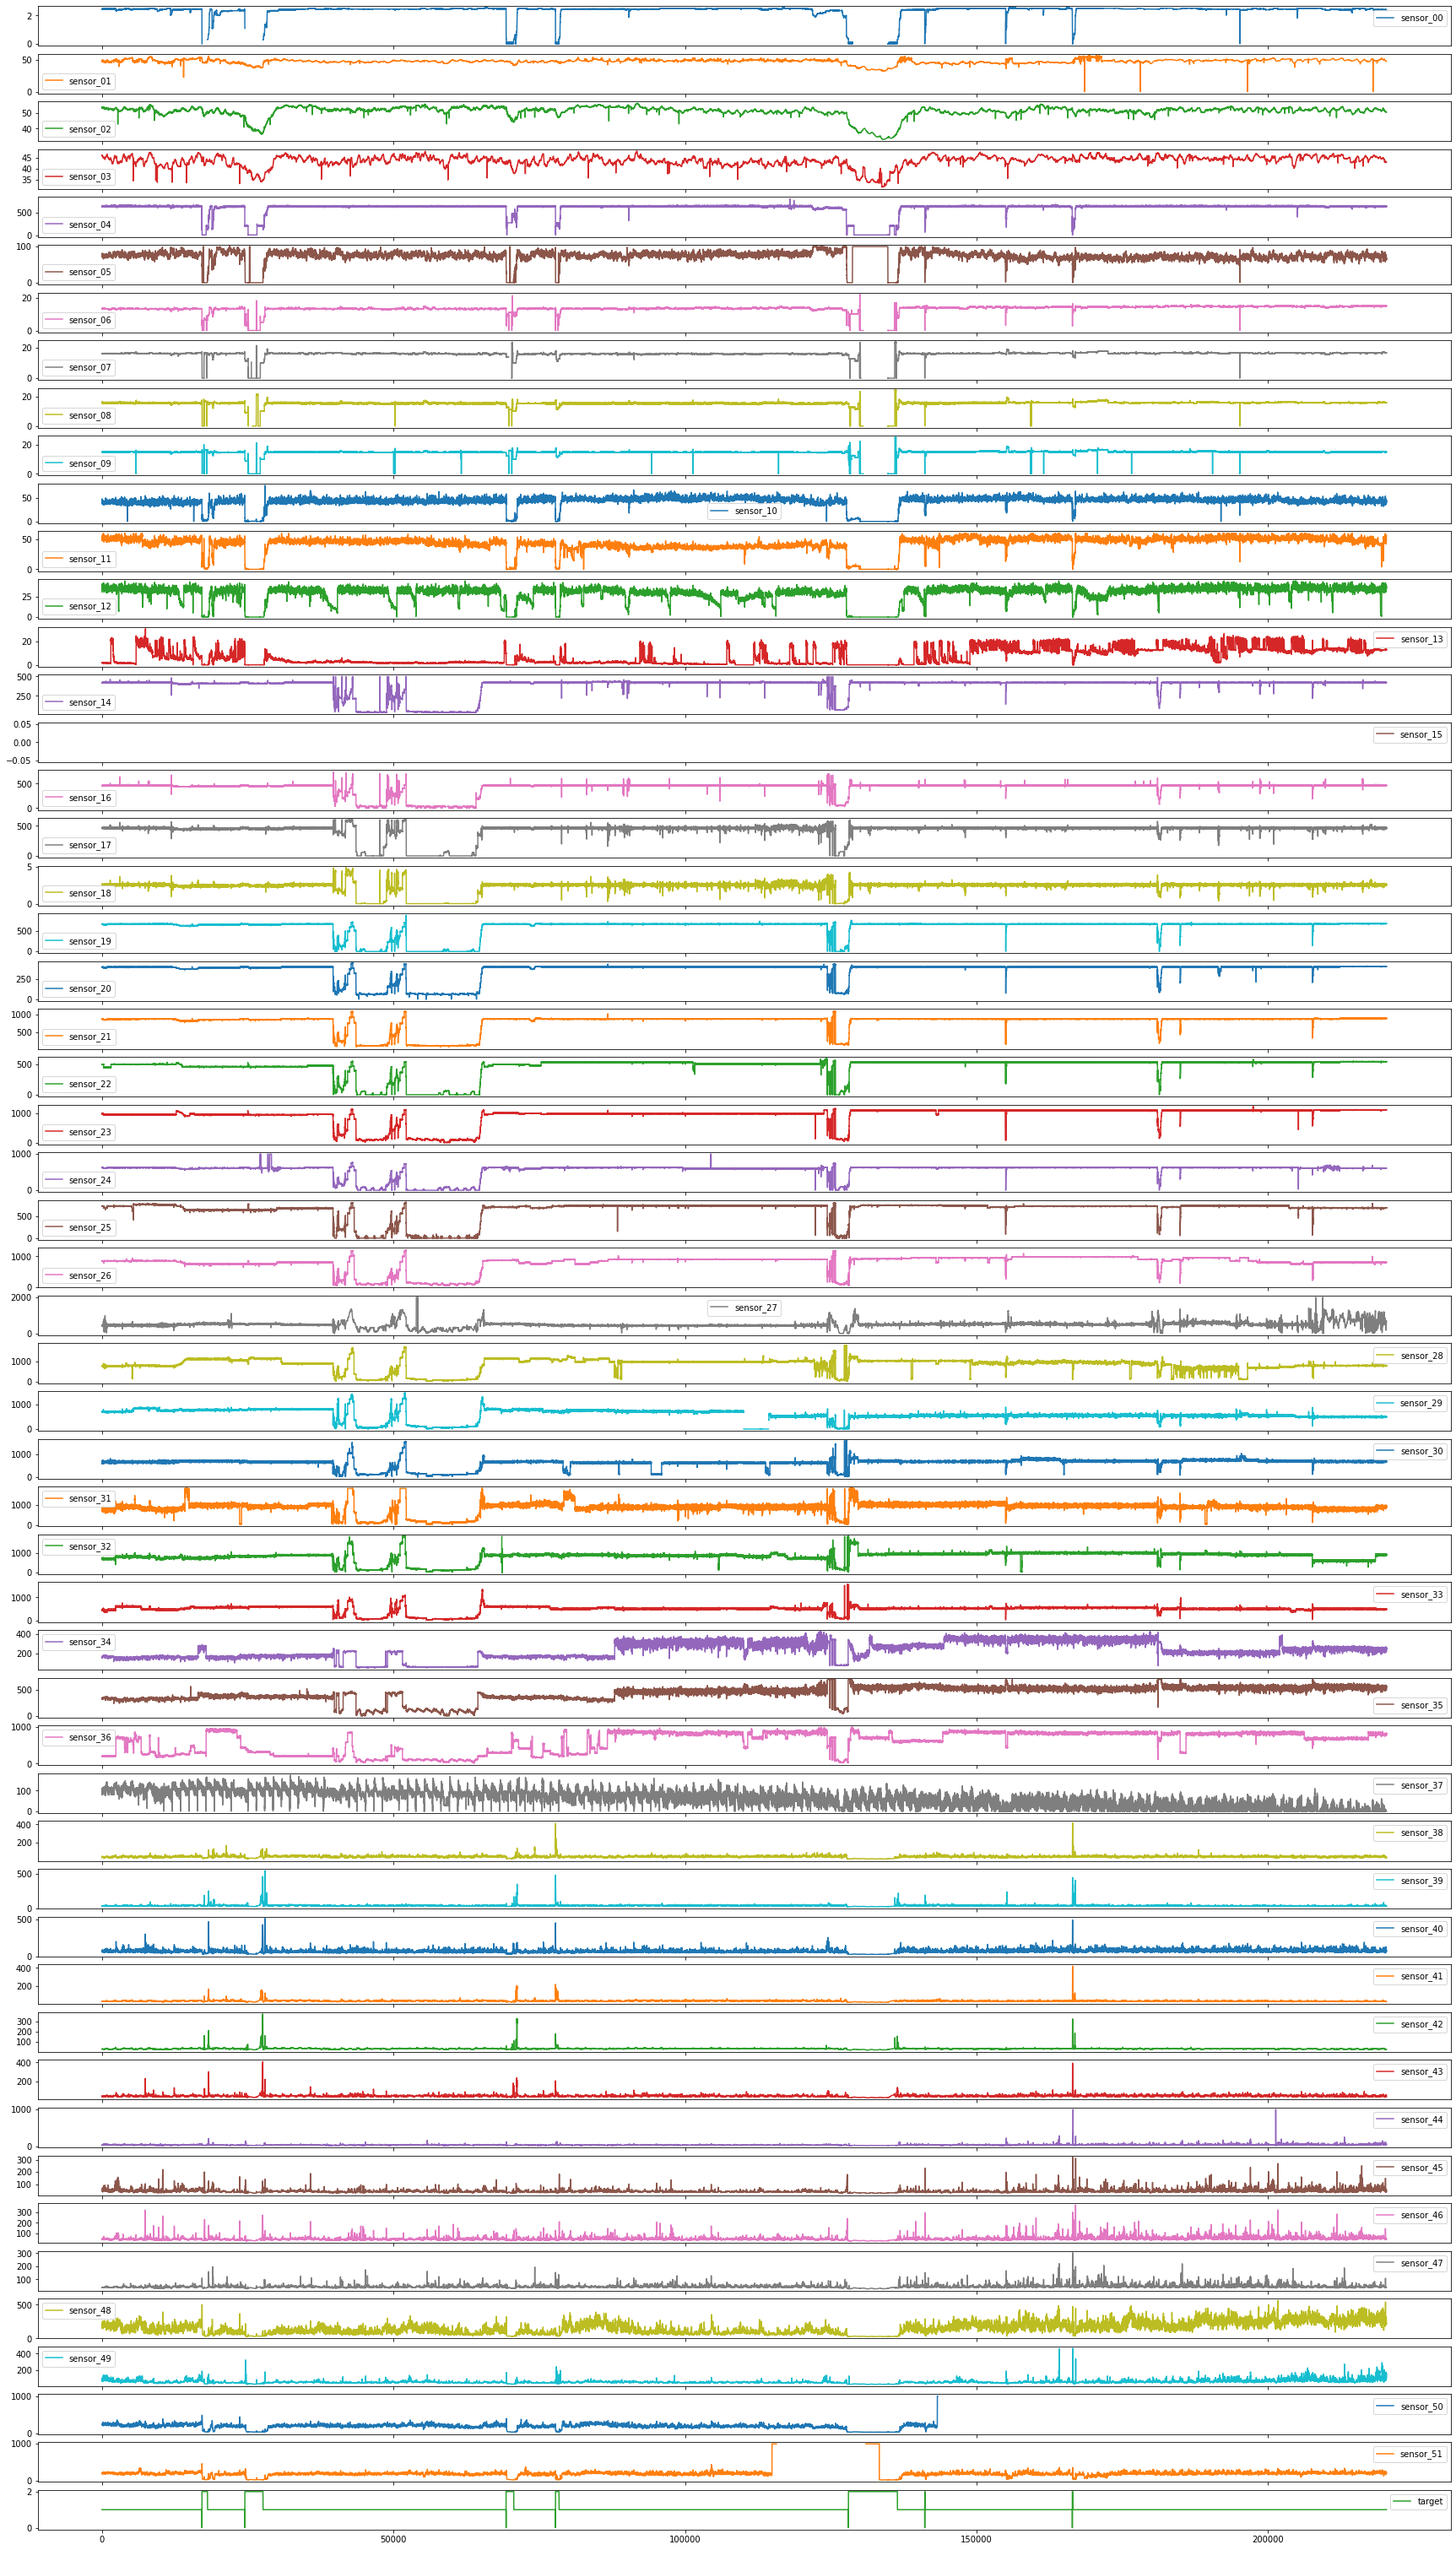

In [8]:
Values=pd.concat([data[senorname],encoded_y],axis=1)#.reindex(dat.index)
plotting_merged(data[senorname],encoded_y, senorname,saving=True)# plot each singal with target
plotting_together(Values) #plot all signals together with target